--- Setup: Loading libraries ---

--- 1. Loading Artifacts ---
Model, preprocessor, and processed data loaded successfully.

--- 2. Extracting Feature Names ---
Total features for the model: 46

--- 3. Calculating SHAP Values ---
This may take a few moments...
SHAP values calculated successfully. ✓

--- 4. Generating SHAP Summary Plot ---


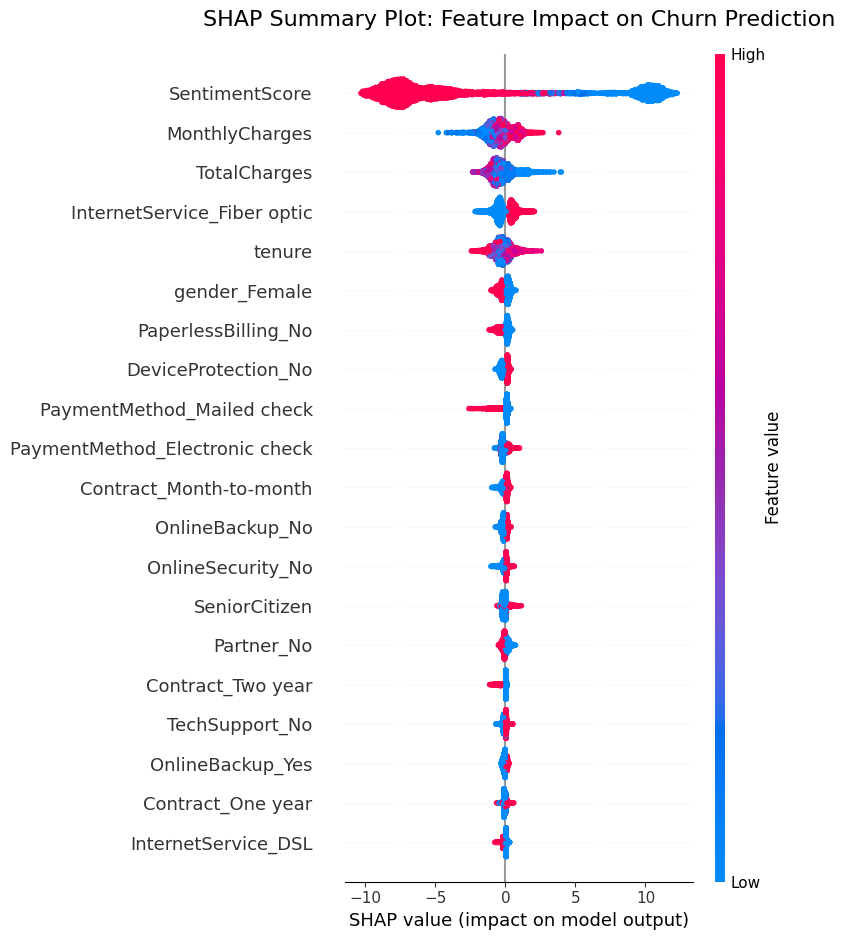


Key Insights from the SHAP plot:
- Features at the top are the most important.
- 'SentimentScore' is the top predictor. High scores (red dots) strongly reduce churn risk (negative SHAP value), while low scores (blue dots) increase it.
- 'MonthlyCharges' is also a major factor. High charges (red dots) push the prediction towards churn (positive SHAP value).
- Low 'tenure' (blue dots) significantly increases churn risk, while high 'tenure' (red dots) decreases it.

--- 5. Saving the SHAP Explainer ---
SHAP explainer saved to 'shap_explainer.pkl'
SHAP values saved to 'shap_values.pkl'

Model interpretation process is complete.


In [3]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import warnings

# --- Setup ---
warnings.filterwarnings('ignore')
print("--- Setup: Loading libraries ---")

# --- 1. Load Model, Preprocessor, and Data ---
print("\n--- 1. Loading Artifacts ---")
try:
    model = joblib.load('churn_model.pkl')
    preprocessor = joblib.load('preprocessor.pkl')
    X_processed = joblib.load('X_processed.pkl')
    y = joblib.load('y_target.pkl')
    print("Model, preprocessor, and processed data loaded successfully.")
except FileNotFoundError:
    print("Error: Model or data files not found. Please run previous scripts first.")
    exit()

# To get meaningful feature names for our plot, we need to extract them from the preprocessor
print("\n--- 2. Extracting Feature Names ---")
# Get numerical feature names directly
num_features = preprocessor.transformers_[0][2]
# Get one-hot encoded categorical feature names
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
# Combine them into a single list
feature_names = np.concatenate([num_features, cat_features])
print(f"Total features for the model: {len(feature_names)}")

# Create a DataFrame from the processed data with correct column names
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)


# --- 3. Calculate SHAP Values ---
print("\n--- 3. Calculating SHAP Values ---")
# SHAP works well with tree-based models like XGBoost
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the entire dataset. This can take a moment.
print("This may take a few moments...")
shap_values = explainer.shap_values(X_processed_df)
print("SHAP values calculated successfully. ✓")


# --- 4. Visualize Feature Importance ---
print("\n--- 4. Generating SHAP Summary Plot ---")
# The SHAP summary plot (beeswarm) is excellent for global feature importance.
# - Each point is a customer.
# - Color indicates the feature's value (high=red, low=blue).
# - X-axis is the SHAP value: a positive value pushes the prediction towards churn (1),
#   a negative value pushes it away from churn (0).
plt.title("SHAP Summary Plot: Feature Impact on Churn Prediction", fontsize=16, pad=20)
shap.summary_plot(shap_values, X_processed_df, plot_type="dot", show=False)
plt.show()

print("\nKey Insights from the SHAP plot:")
print("- Features at the top are the most important.")
print("- 'SentimentScore' is the top predictor. High scores (red dots) strongly reduce churn risk (negative SHAP value), while low scores (blue dots) increase it.")
print("- 'MonthlyCharges' is also a major factor. High charges (red dots) push the prediction towards churn (positive SHAP value).")
print("- Low 'tenure' (blue dots) significantly increases churn risk, while high 'tenure' (red dots) decreases it.")


# --- 5. Save the SHAP Explainer ---
print("\n--- 5. Saving the SHAP Explainer ---")
joblib.dump(explainer, 'shap_explainer.pkl')
joblib.dump(shap_values, 'shap_values.pkl')
print("SHAP explainer saved to 'shap_explainer.pkl'")
print("SHAP values saved to 'shap_values.pkl'")

print("\nModel interpretation process is complete.")


In [5]:
#pip install shap